Student Performance Indicator


Life Of Ml Project

1)  Undertanding the  problem statement
2)  Data Collection
3)  Data checks to perform
4)  exploratory data analysis
5)  data pre-processing
6)  model selection and training
7)  model evaluation
8)  model deployment
9)  model monitoring and maintenance

1) Problem Statement 

this project understands how the student performance (test score) is affected by other variable such as Gender , Ethnicity , Parent Level Of Education , Lunch and Teest Preparation Courses

2) Data Collection

 Import data and Required Packages

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [108]:
dataset = pd.read_csv("../notebook/data/StudentsPerformance.csv")
dataset.head(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44


In [109]:
dataset.shape

(1000, 8)

Dataset Information

1) gender : sex of students -> (Male/female)
1) race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
1) parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
1) lunch : having lunch before test (standard or free/reduced)
1) test preparation course : complete or not complete before test
1) math score
1) reading score
1) writing score

3) Dataset Checks To Perform


* Check Missing Values
* check duplicates
* check data types
* check the number of unique values for each column
* check statistics of data set
* check various categories present in the difeerent categorical column

In [110]:
dataset.isnull().sum() # check missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [111]:
dataset.duplicated().sum()   # check duplicates

0

In [112]:
dataset.info() # check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [113]:
dataset.nunique()  # check unique values of each column

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [114]:
dataset.describe() # statistics of the dataset

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight

1) From above description of numerical data, all means are very close to each other - between 66 and 68.05;
2) All standard deviations are also close - between 14.6 and 15.19;
3) While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [115]:
dataset.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [116]:
print("Categories in 'gender' variable:     ",end=" " )
print(dataset['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(dataset['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(dataset['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(dataset['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(dataset['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [117]:
# define categorical and numerical columns
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [118]:
dataset.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74


Add Columns Of the total Score And Average

In [119]:
dataset["total score"] = dataset["math score"] + dataset["reading score"] + dataset["writing score"]
dataset["average"] = (dataset["total score"])/3
dataset.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


depenedent feature is total score or average

In [120]:
reading_full = dataset[dataset['reading score'] == 100]['average'].count()
writing_full = dataset[dataset['writing score'] == 100]['average'].count()
math_full = dataset[dataset['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [121]:
reading_full = dataset[dataset['reading score'] <= 20]['average'].count()
writing_full = dataset[dataset['writing score'] <= 20]['average'].count()
math_full = dataset[dataset['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_full}')
print(f'Number of students with less than 20 marks in Writing: {writing_full}')
print(f'Number of students with less than 20 marks in Reading: {reading_full}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


In [142]:
dataset.to_csv('cleaned_data.csv', index=False)


Insights
1) From above values we get students have performed the worst in Maths
2) Best performance is in reading section

4. Exploring Data ( Visualization )
* Visualize average score distribution to make some conclusion.
* Histogram
* Kernel Distribution Function (KDE)

Histogram & KDE

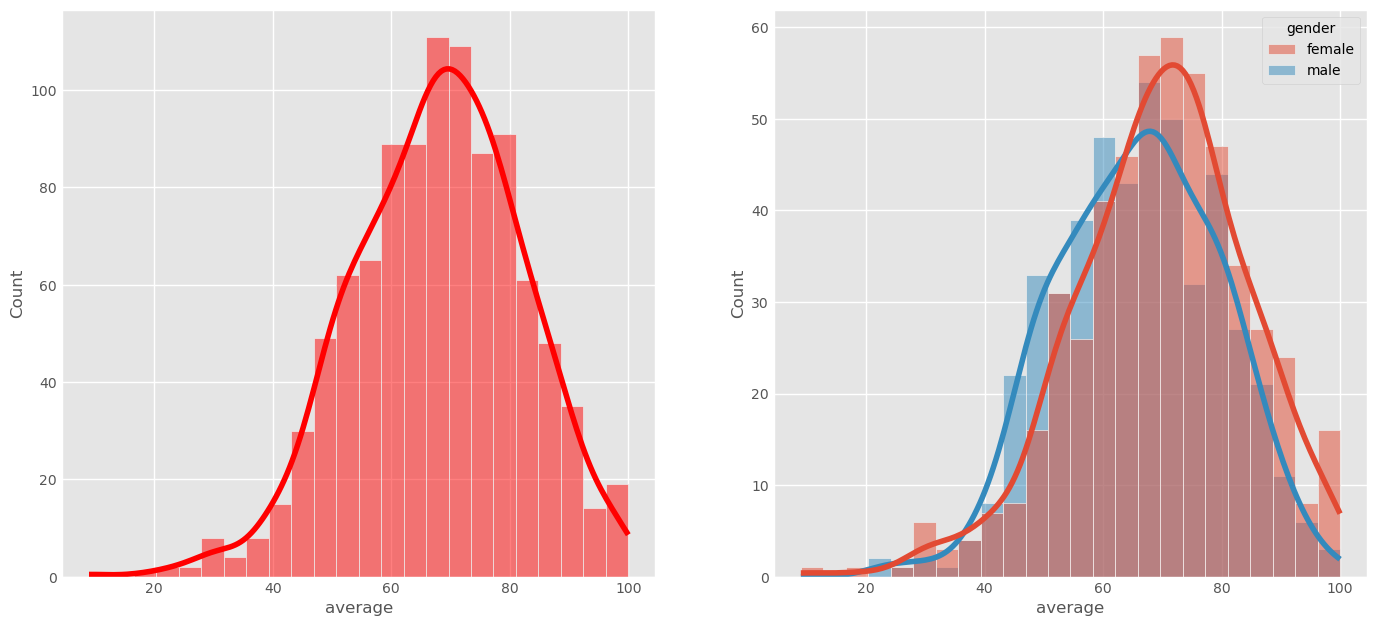

In [122]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=dataset , x="average" , kde=True,color="r")
#  kde=True option overlays a Kernel Density Estimate (KDE) curve on the histogram, which represents the distribution of the data.
plt.subplot(122)
sns.histplot(data=dataset , x="average" , kde=True, hue="gender")
# hue="gender" argument differentiates the data by the gender column, adding color to show the different gender categories.
plt.show()


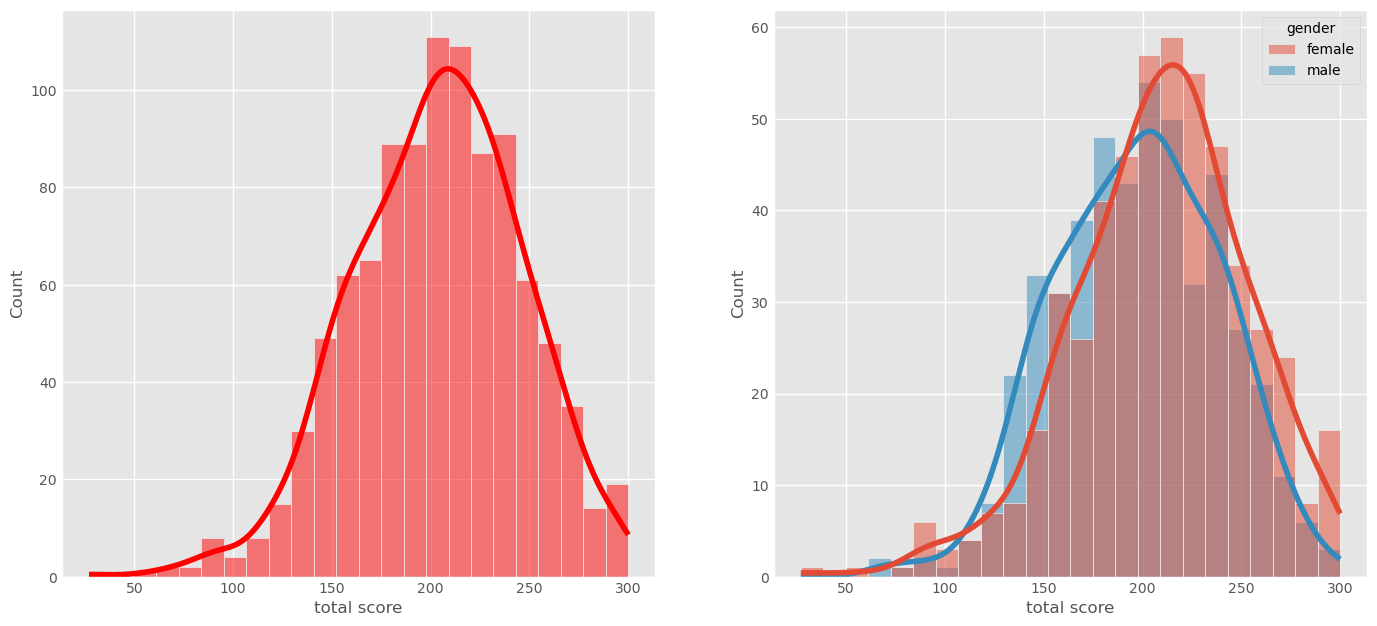

In [123]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=dataset , x="total score" , kde=True,color="r")
# kde -  a Kernel Density Estimate (a smoothed curve to show the distribution).
plt.subplot(122)
sns.histplot(data=dataset , x="total score" , kde=True, hue="gender")
# hue="gender" argument differentiates the data by the gender column, adding color to show the different gender categories.
plt.show()

#####  Insights
- Female students tend to perform well then male students.

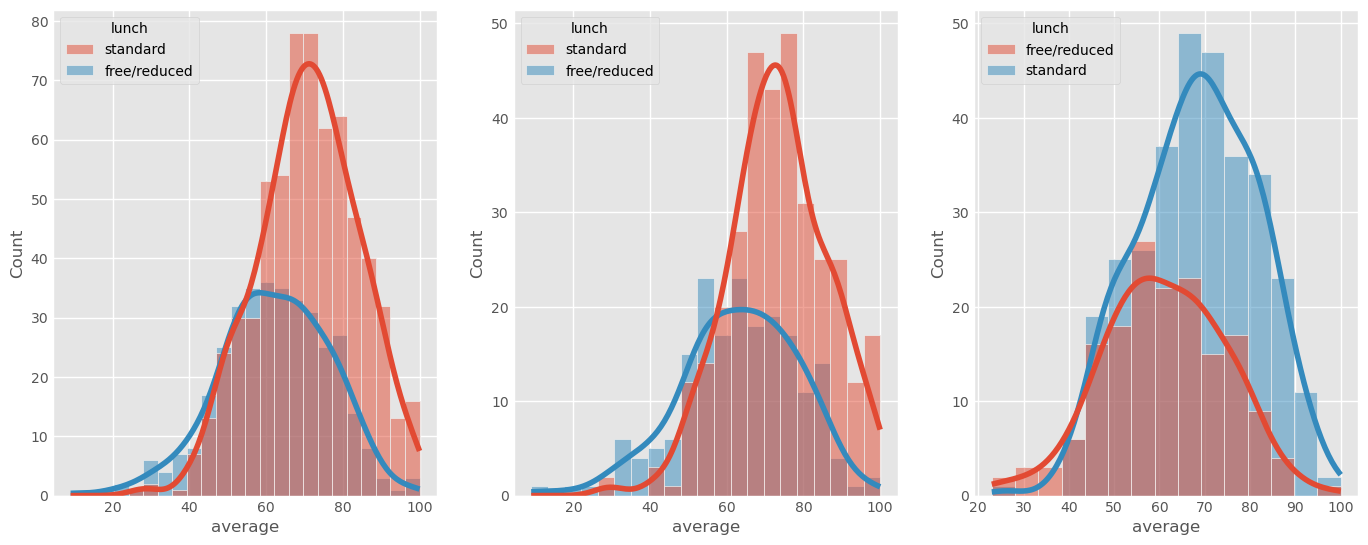

In [124]:
plt.subplots(1,3 , figsize=(15,6))
plt.subplot(131)
sns.histplot(data=dataset , x="average" , kde=True , hue="lunch" )
plt.subplot(132)
sns.histplot(data=dataset[dataset.gender == "female"] , x="average" , kde=True , hue="lunch" )
# creates a histogram of the average column, but only for rows where gender == "female"
plt.subplot(133)
sns.histplot(data=dataset[dataset.gender == "male"] , x="average" , kde=True , hue="lunch" )
# creates a histogram of the average column, but only for rows where gender == "male"
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

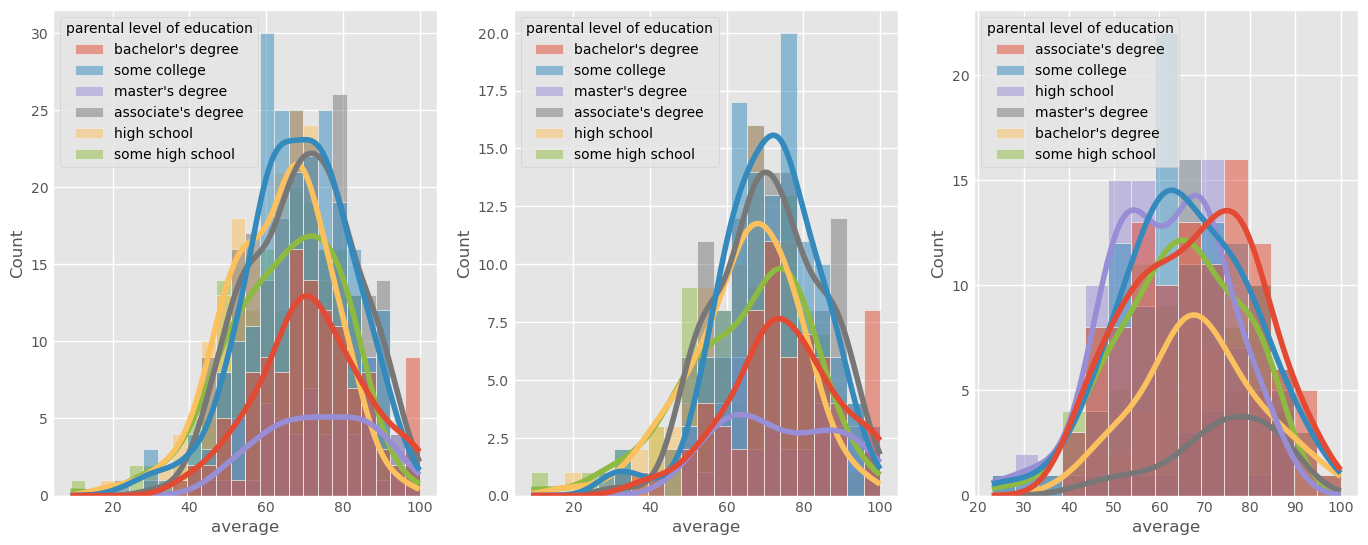

In [125]:
plt.subplots(1,3 , figsize=(15,6))
plt.subplot(131)
sns.histplot(data=dataset , x="average" , kde=True , hue="parental level of education" )
plt.subplot(132)
sns.histplot(data=dataset[dataset.gender == "female"] , x="average" , kde=True , hue="parental level of education" )
# creates a histogram of the average column, but only for rows where gender == "female"
plt.subplot(133)
sns.histplot(data=dataset[dataset.gender == "male"] , x="average" , kde=True , hue="parental level of education" )
# creates a histogram of the average column, but only for rows where gender == "male"
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

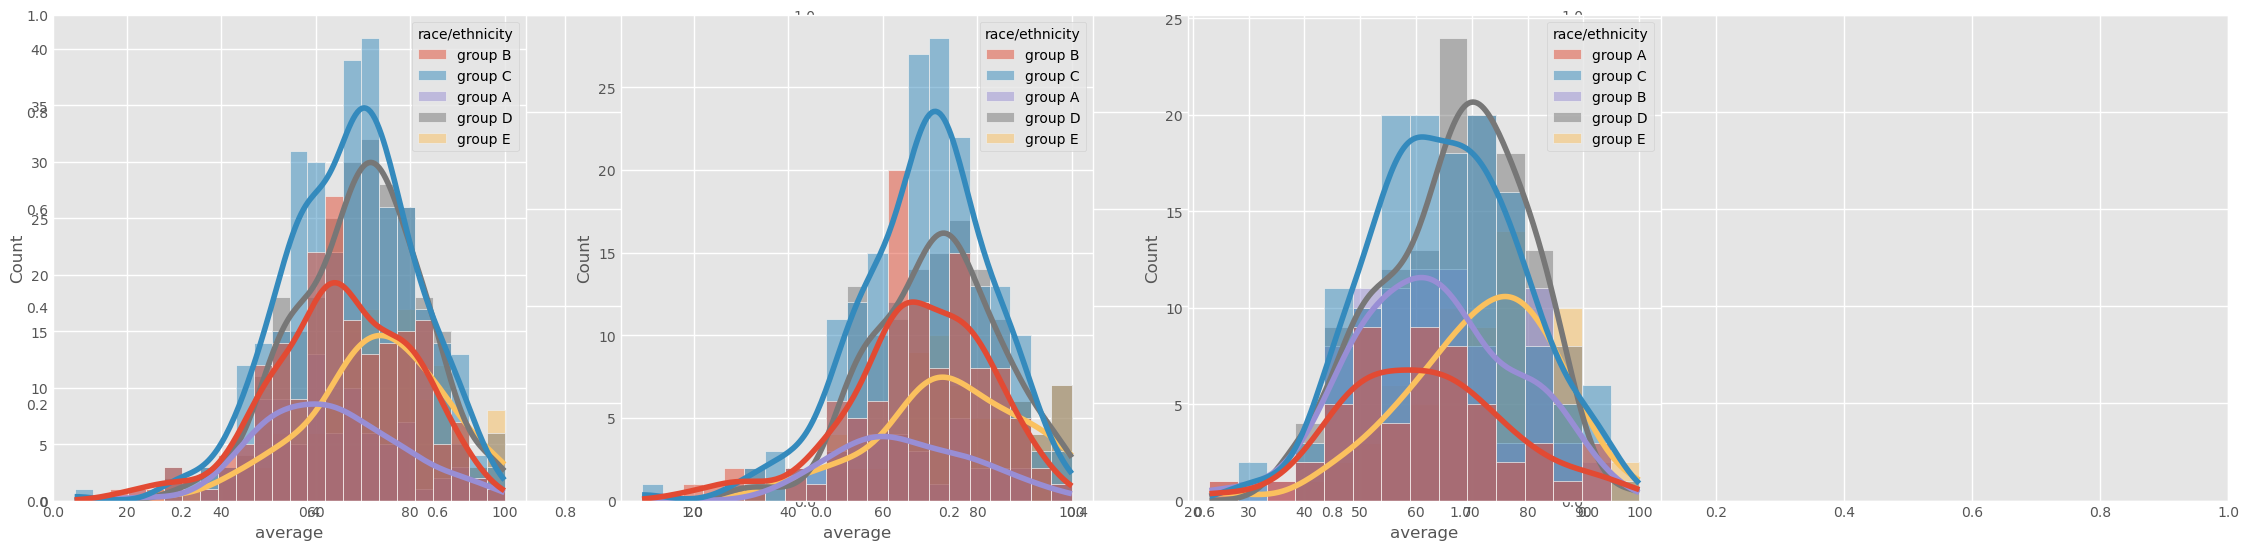

In [126]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=dataset,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=dataset[dataset.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=dataset[dataset.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

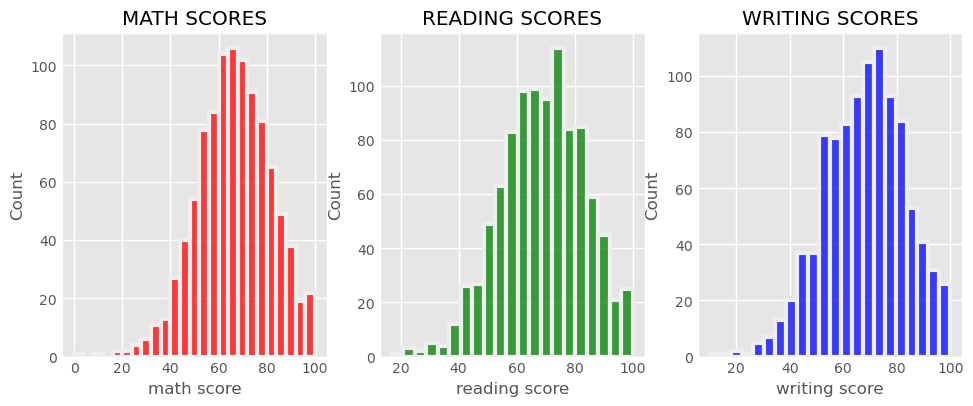

In [127]:
plt.figure(figsize=(14,4))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.histplot(x='math score',data=dataset,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.histplot(x='reading score',data=dataset,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.histplot(x='writing score',data=dataset,color='blue',linewidth=3)
plt.show()


#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### Multivariate analysis using pieplot

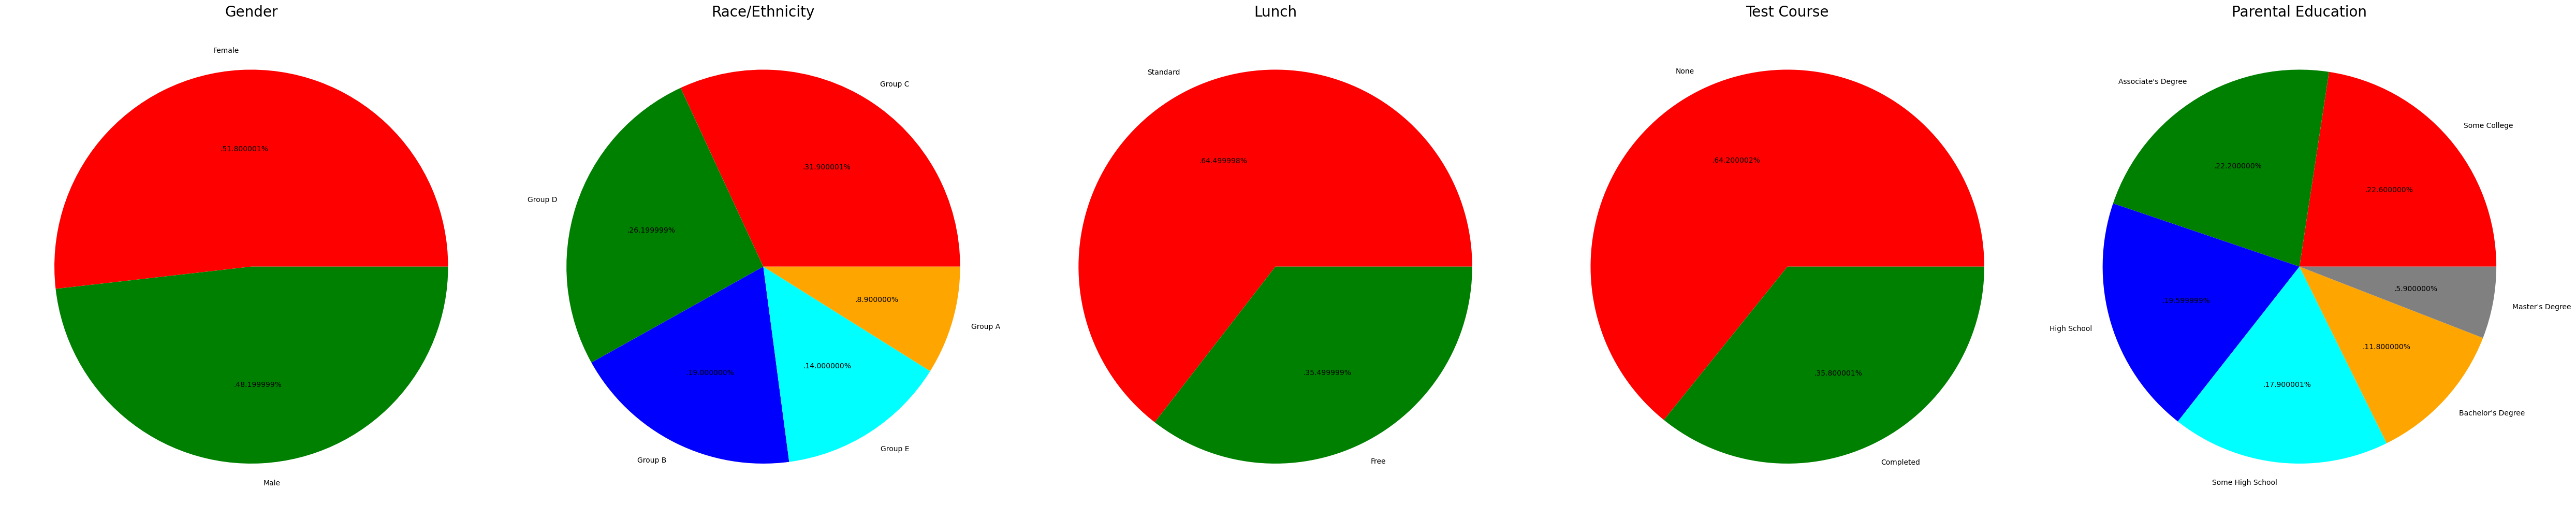

In [128]:
plt.rcParams['figure.figsize'] = (50, 40)

plt.subplot(1, 5, 1)
size = dataset['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = dataset['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = dataset['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = dataset['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = dataset['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')
plt.tight_layout()
plt.grid()
plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

####  Feature Wise Visualization
####  GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

In [129]:
#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

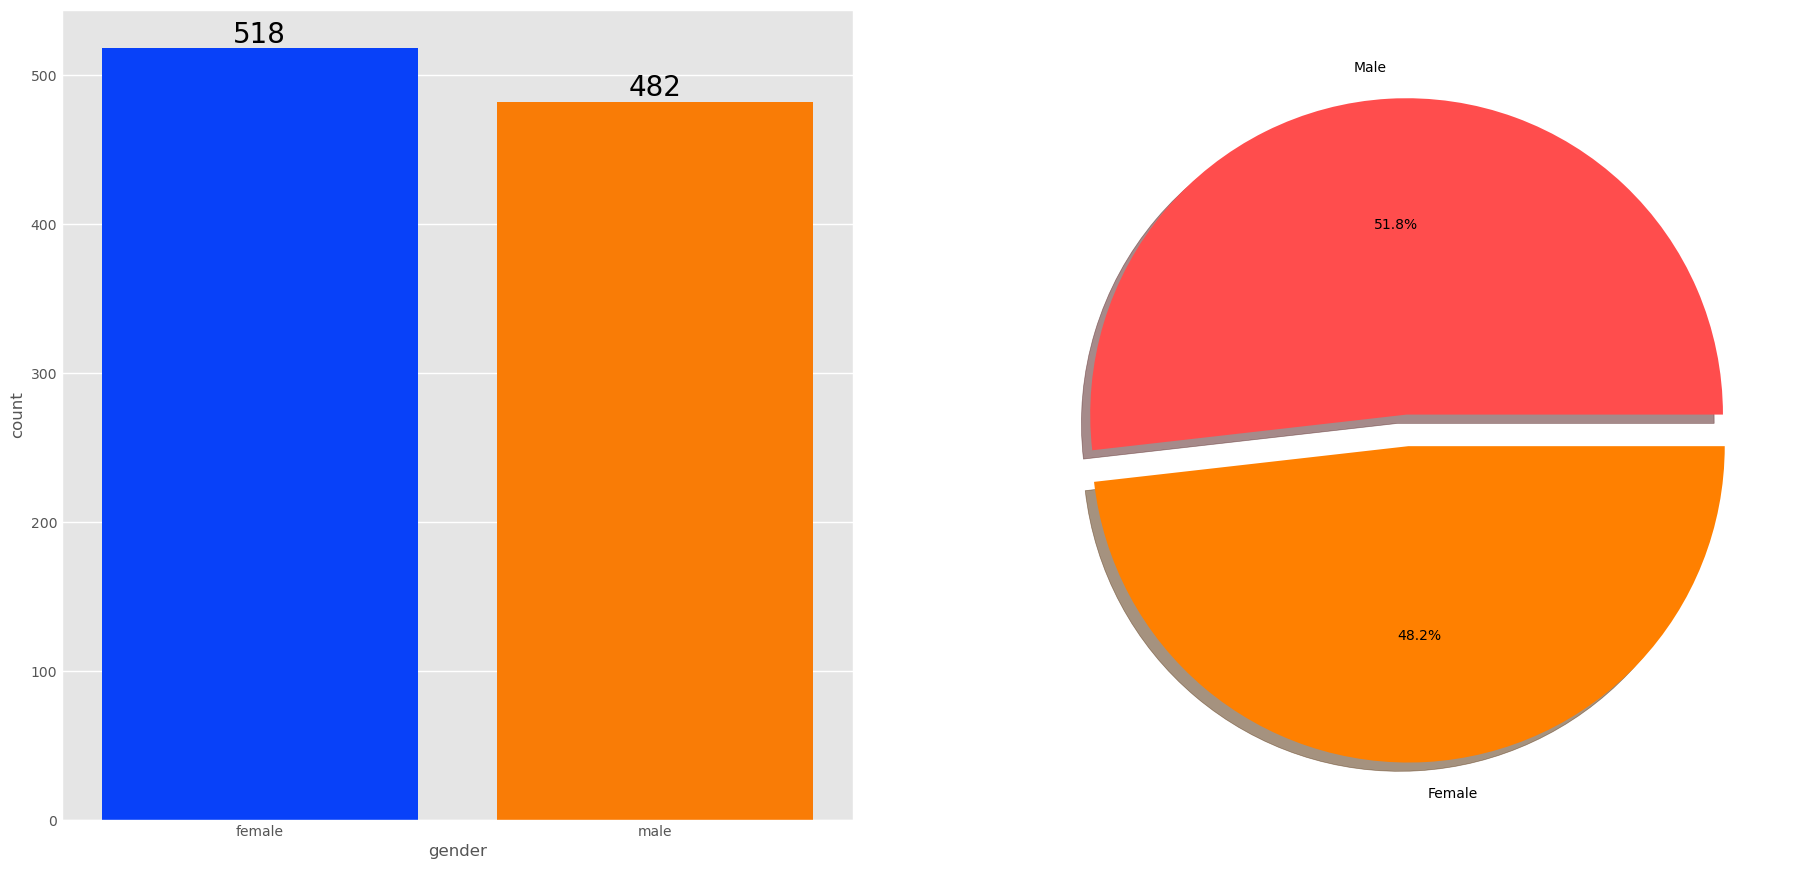

In [130]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=dataset['gender'],data=dataset,palette ='bright',ax=ax[0],saturation=0.95)
# sns.countplot(...): Creates a bar plot (count plot) that shows the count of occurrences of each gender in the dataset ('Male' and 'Female').
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
# This loop iterates over the bar containers in the count plot (ax[0].containers) and adds a label to each bar showing the exact count.
# ax[0].bar_label(...): Adds a label to each bar in the bar container.
# color='black': Sets the color of the labels to black.
# size=20: Sets the font size of the labels to 20, making them large and readable.  
plt.pie(x=dataset['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [131]:
# Select only numeric columns from the dataset
numeric_columns = dataset.select_dtypes(include=['number'])

# Group by 'gender' and calculate the mean of the numeric columns
gender_group = numeric_columns.groupby(dataset['gender']).mean()

print(gender_group)


        math score  reading score  writing score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


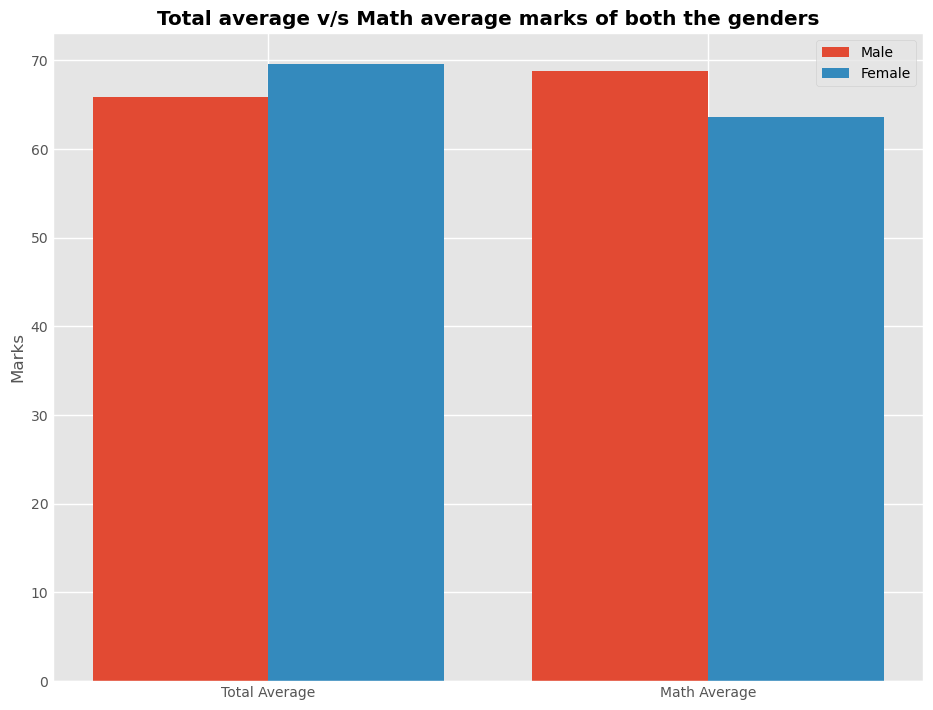

In [132]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.


####  RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

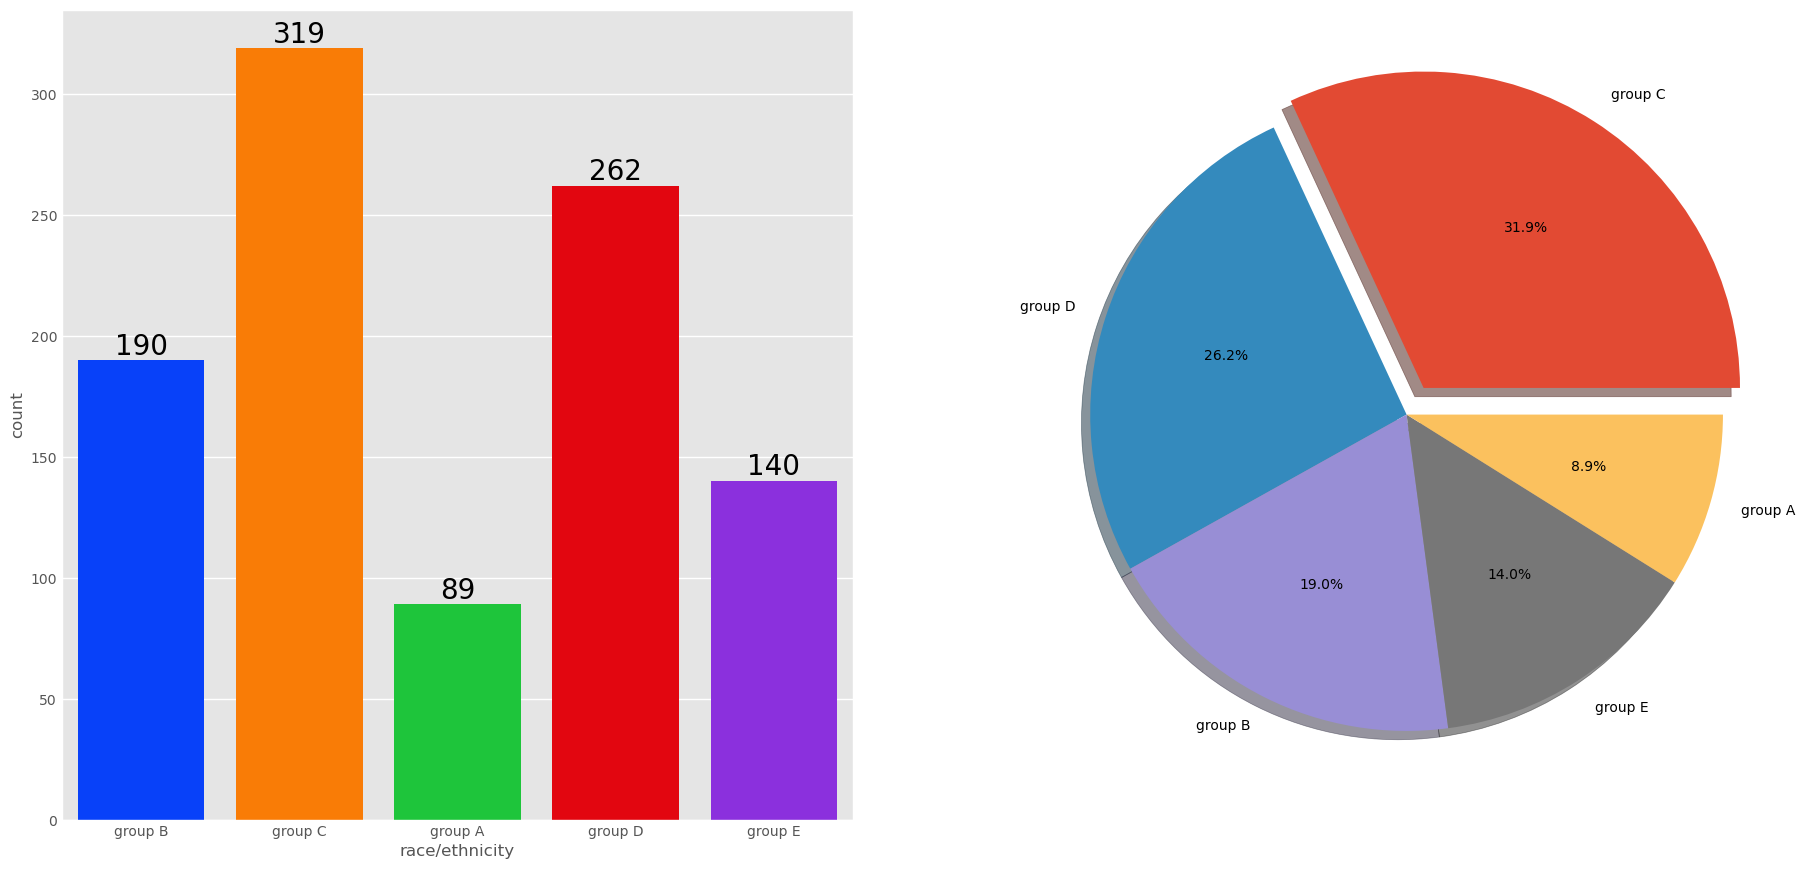

In [133]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=dataset['race/ethnicity'],data=dataset,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = dataset['race/ethnicity'].value_counts(),labels=dataset['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.


#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

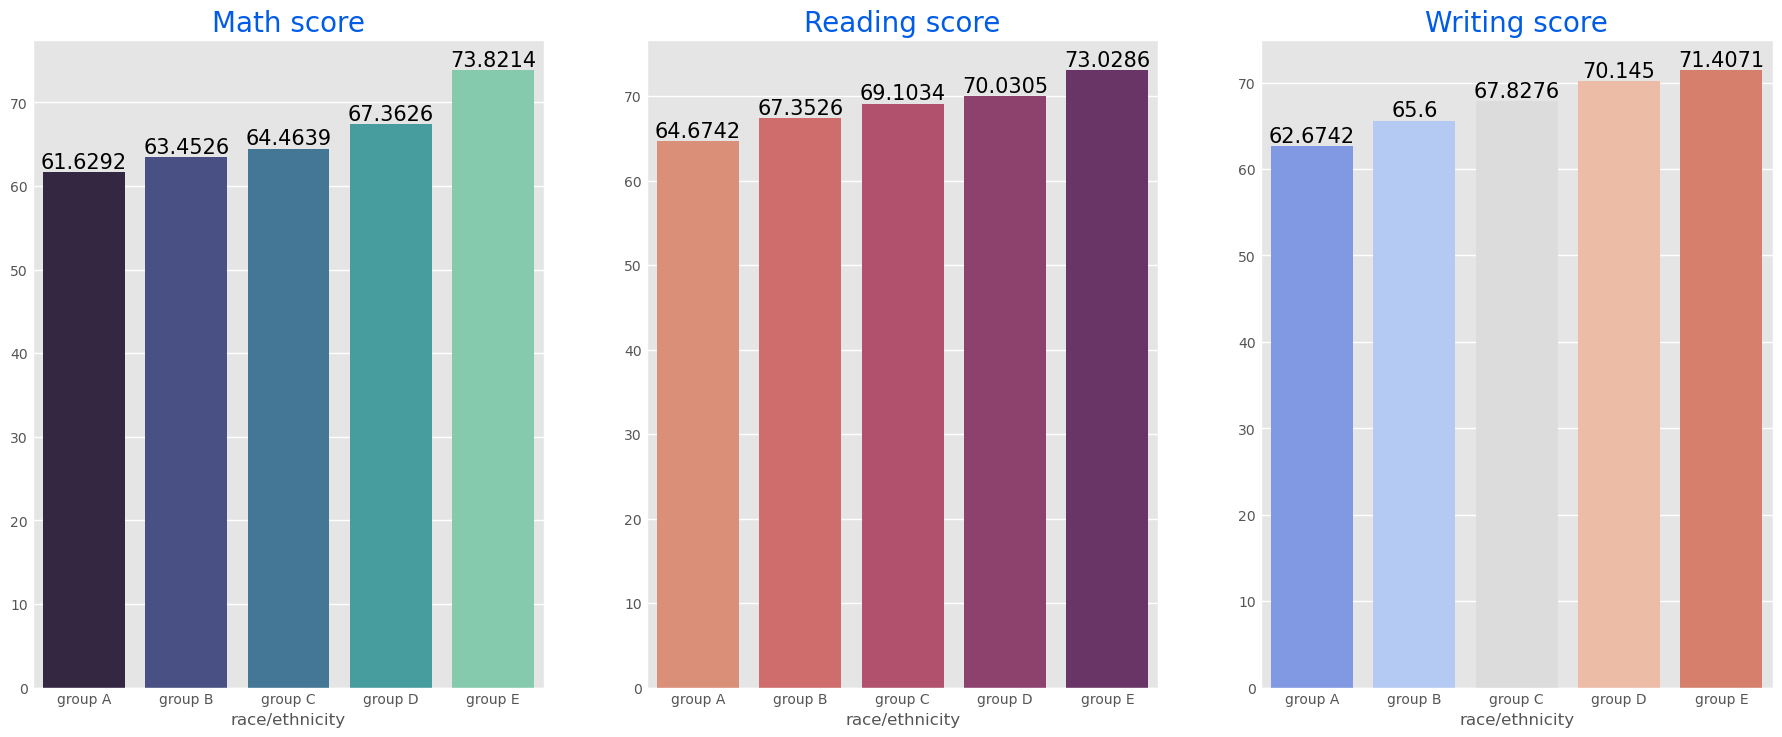

In [134]:
Group_data2=dataset.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

####  PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

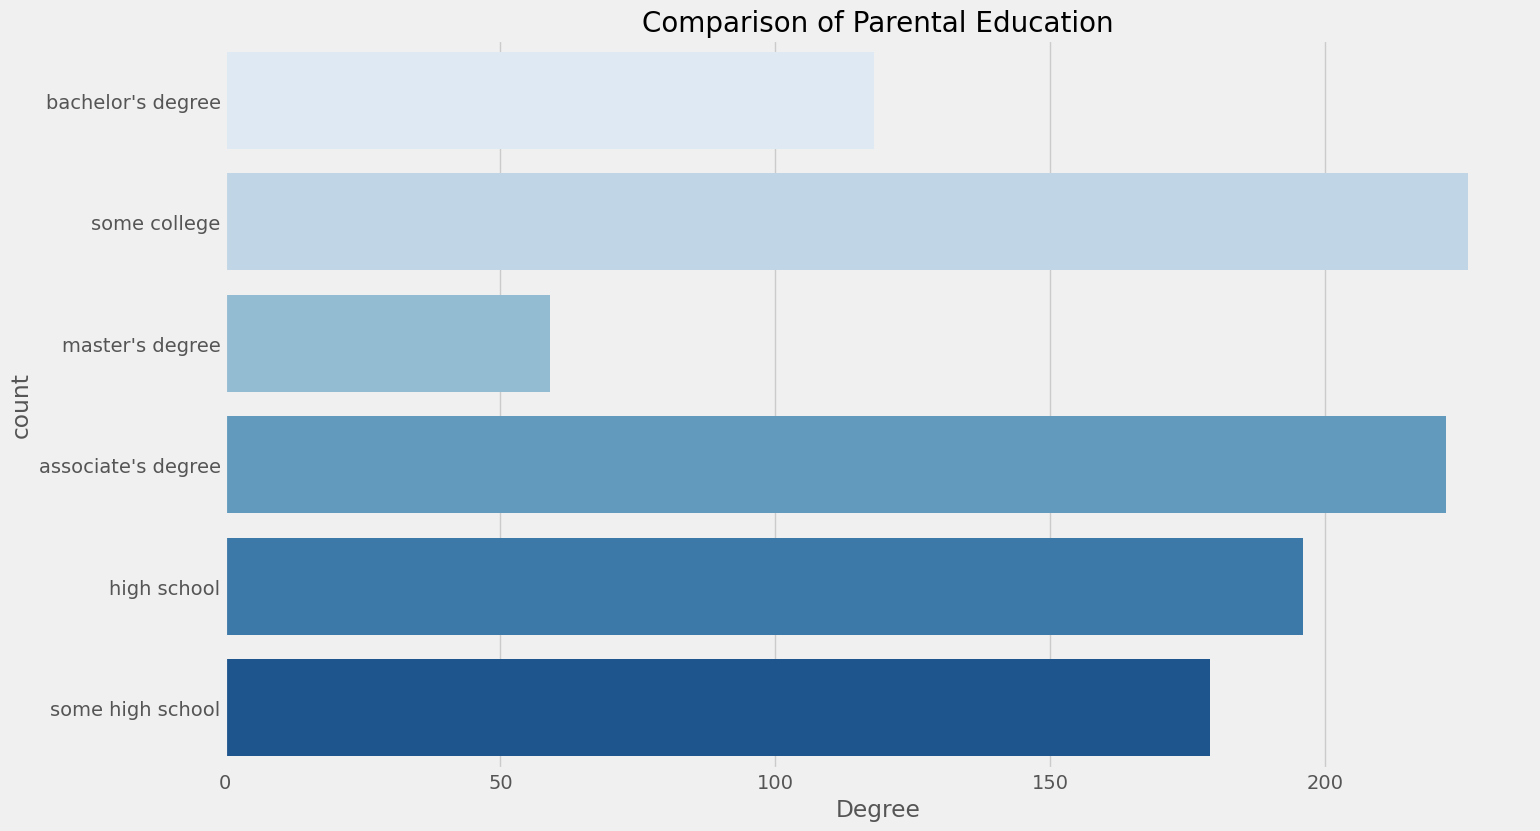

In [135]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(dataset['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

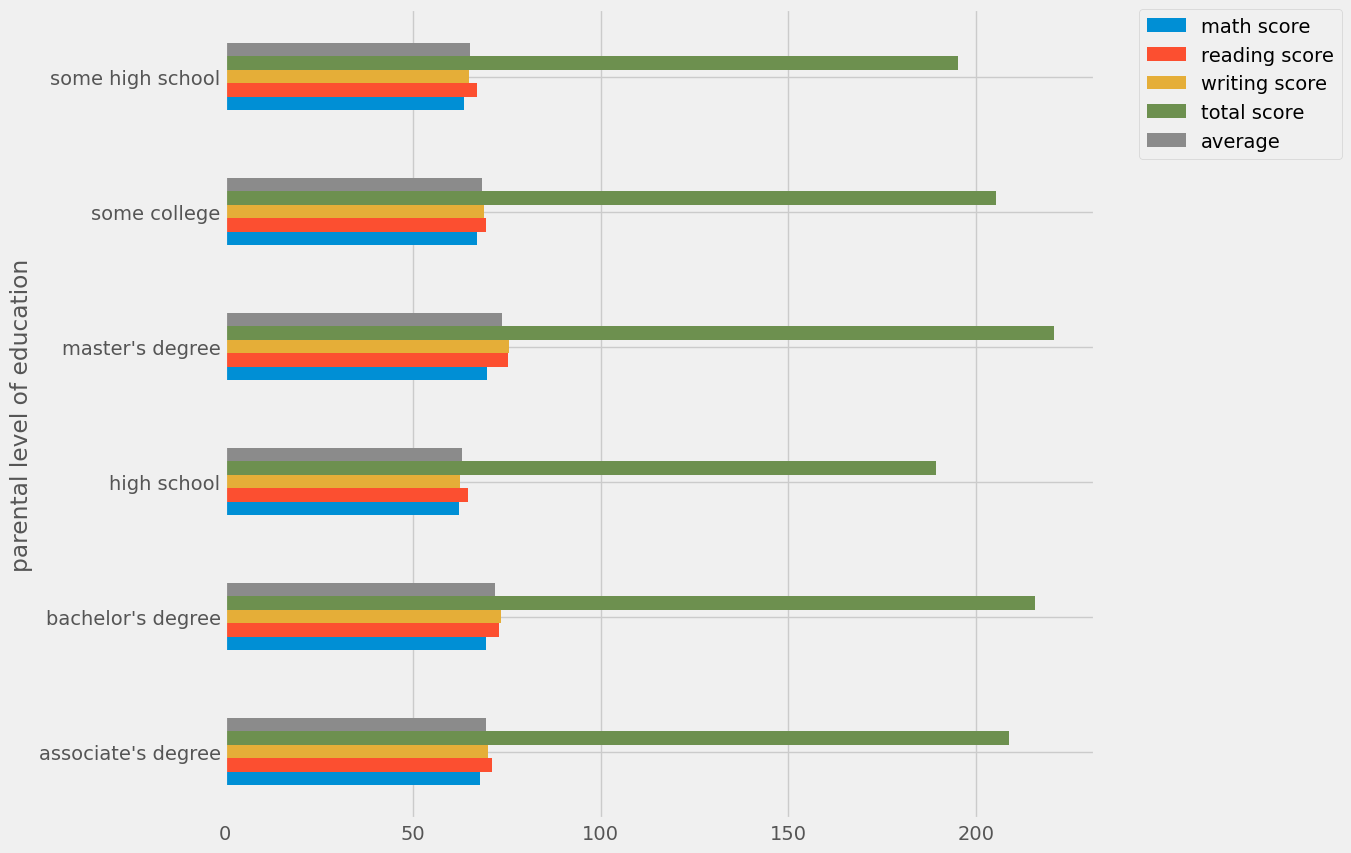

In [136]:
# Filter out non-numeric columns
numeric_columns = dataset.select_dtypes(include=['number']).columns

# Group by 'parental level of education' and calculate the mean for numeric columns
dataset.groupby('parental level of education')[numeric_columns].mean().plot(kind='barh', figsize=(10, 10))

# Adjust the legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

####  LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

In [137]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


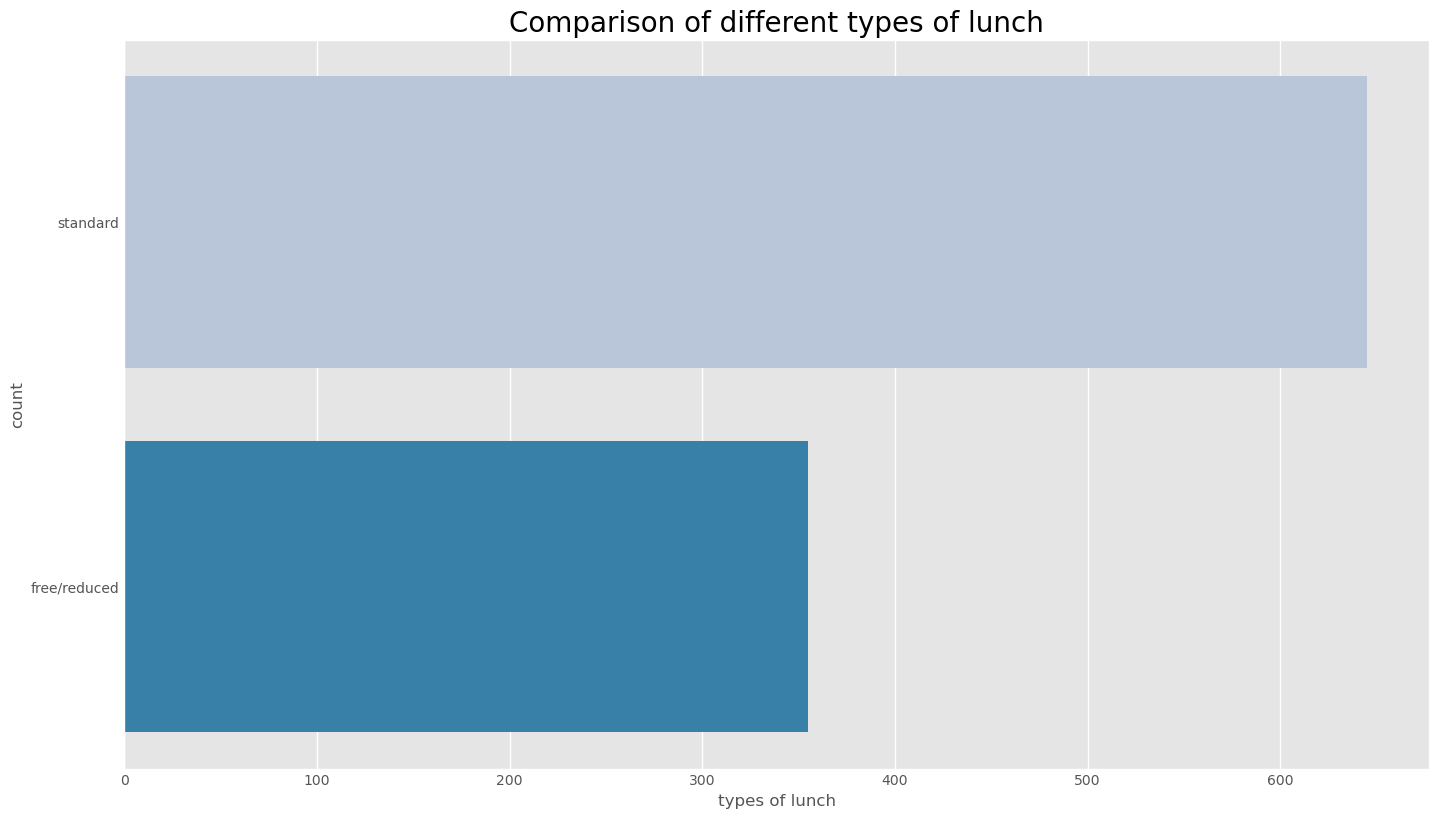

In [138]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')  # Use a valid style
sns.countplot(dataset['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()


#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

####  TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing score'>

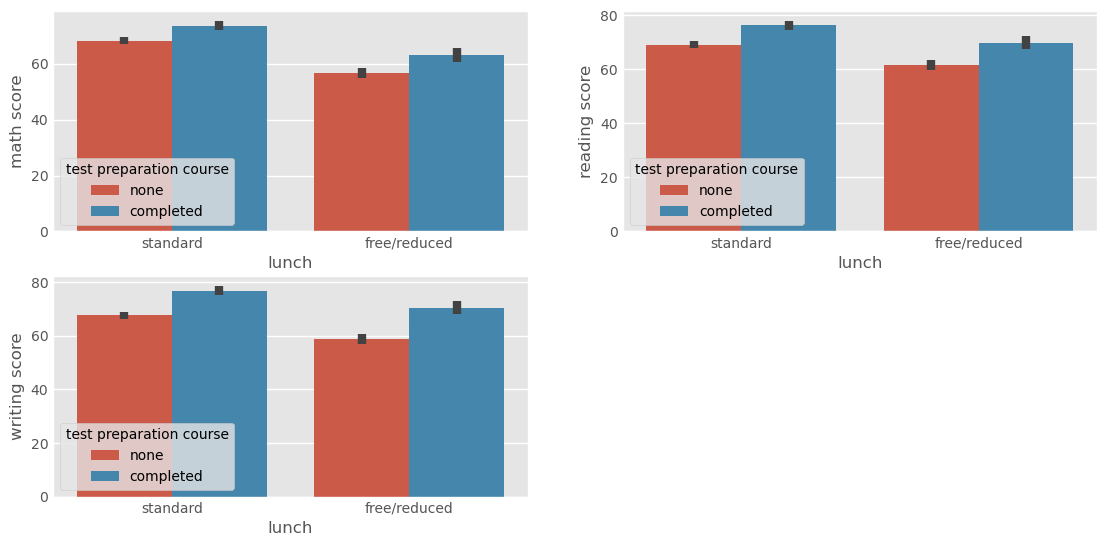

In [139]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=dataset['lunch'], y=dataset['math score'], hue=dataset['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=dataset['lunch'], y=dataset['reading score'], hue=dataset['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=dataset['lunch'], y=dataset['writing score'], hue=dataset['test preparation course'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

CHECKING OUTLIERS

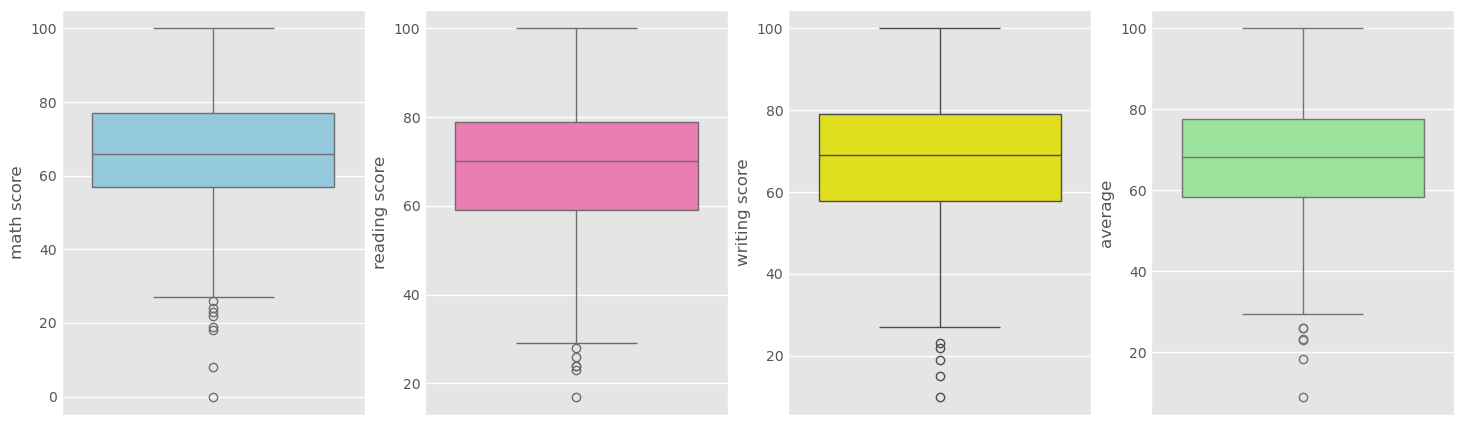

In [140]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(dataset['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(dataset['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(dataset['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(dataset['average'],color='lightgreen')
plt.show()

####  MUTIVARIATE ANALYSIS USING PAIRPLOT

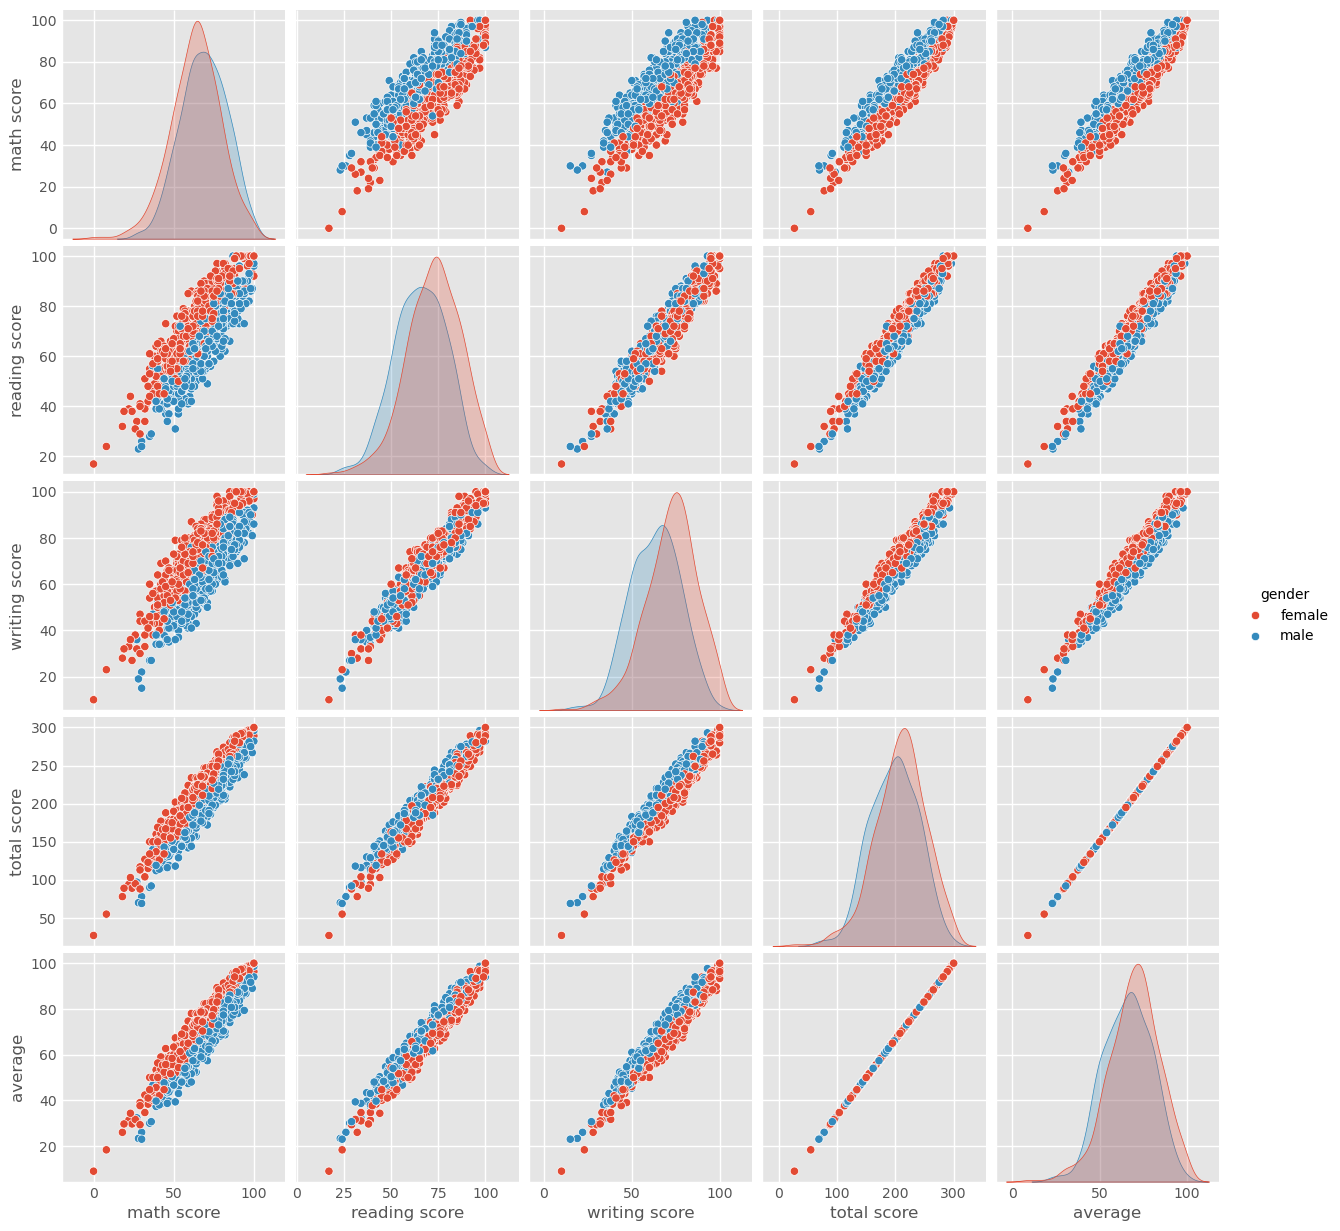

In [141]:
sns.pairplot(dataset,hue = 'gender')
plt.show()

## Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.